# Decision Tree

In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("../Datasets/data.csv")

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
X = data.drop("target",axis=1)
Y = data["target"]

In [5]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)

In [6]:
X_train.shape,y_train.shape

((242, 13), (242,))

In [7]:
X_test.shape,y_test.shape

((61, 13), (61,))

### Decision Tree using Entropy

In [8]:
model = DecisionTreeClassifier(criterion="entropy")

In [9]:
model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

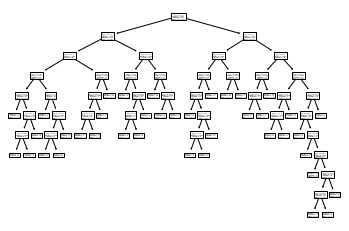

In [10]:
plot_tree(model);

In [11]:
predictedResults = model.predict(X_test)

In [12]:
actualResults = np.array(y_test)

In [13]:
performance = confusion_matrix(actualResults,predictedResults)

In [14]:
print(performance)

[[23  5]
 [ 8 25]]


In [15]:
pZeroCount = list(predictedResults).count(0)
pOneCount = list(predictedResults).count(1)
aZeroCount = list(actualResults).count(0)
aOneCount = list(actualResults).count(1)

In [16]:
plt.style.use("seaborn")

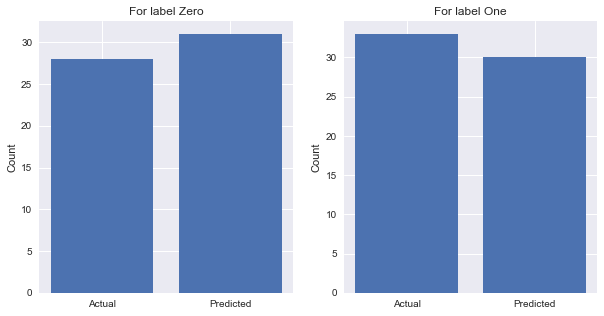

In [17]:
fig, (ax1, ax2) = plt.subplots(nrows=1,ncols=2,figsize=(10,5))

ax1.bar(["Actual","Predicted"],[aZeroCount,pZeroCount])
ax1.set(ylabel="Count",title="For label Zero")

ax2.bar(["Actual","Predicted"],[aOneCount,pOneCount])
ax2.set(ylabel="Count",title="For label One");

In [18]:
accuracy_score(actualResults,predictedResults)

0.7213114754098361